In [48]:
import pandas as pd
import numpy as np
import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [49]:
df_orig = pd.read_csv('Datasets/good_badnews_NewsArticles.csv')

In [50]:
df = df_orig.copy()

In [51]:
df.drop('URL', inplace=True, axis=1);
#df.replace([1,2,3], ['good', 'neutral', 'bad'], inplace=True);
df.rename(columns={'Majority Score' : 'Sentiment'}, inplace=True);
df = df.reindex(columns=['Title', 'Sentiment']);

In [52]:
df.head()

,Title,Sentiment
0,Father and son among five arrested over sick grenfell tower bonfire video,bad
1,Ryanair new hand luggage policy rules passenger coat video travel,neutral
2,Derek whyteside 'murdered' by boy with cricket bata stepfather looking for two stolen bikes was murdered by a 16 year old,bad
3,Spain bans uk tourists from buying common painkiller,bad
4,Bill gates puts up $400m for safer sanitation,good


In [53]:
df_small =df.groupby('Sentiment')['Title'].apply(' '.join).reset_index();

In [54]:
pd.set_option('display.max_colwidth', -1)

In [55]:
df_small

Sentiment  \
0  bad        
1  good       
2  neutral    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [66]:
text_neg = df_small.Title[0]

In [67]:
sp = spacy.load('en_core_web_sm')
doc = sp(text_neg)

In [68]:
newText_neg =' '
for word in doc:
    if word.pos_ in ['ADJ', 'NOUN']:
        newText_neg = ' '.join((newText_neg, word.text.lower()))

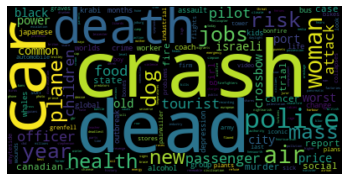

In [69]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(newText_neg)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

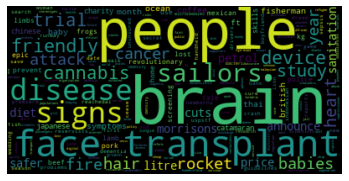

In [64]:
text_pos = df_small.Title[1]
sp = spacy.load('en_core_web_sm')
doc = sp(text_pos)
newText_pos =' '
for word in doc:
    if word.pos_ in ['ADJ', 'NOUN']:
        newText_pos = ' '.join((newText_pos, word.text.lower()))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(newText_pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

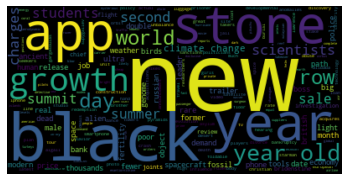

In [65]:
text_neut = df_small.Title[2]
sp = spacy.load('en_core_web_sm')
doc = sp(text_neut)
newText_neut =' '
for word in doc:
    if word.pos_ in ['ADJ', 'NOUN']:
        newText_neut = ' '.join((newText_neut, word.text.lower()))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(newText_neut)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()